In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def exponential_smoothing_1(alpha, data):
    '''
    一次指数平滑
    :param alpha:  平滑系数
    :param data:   数据序列：list
    :return:       返回一次指数平滑值：list
    '''
    s_single=[]
    s_single.append(data[0])
    for i in range(1, len(data)):
        s_single.append(alpha * data[i] + (1 - alpha) * s_single[i-1])
    return s_single

In [3]:
def exponential_smoothing_2(alpha, data):
    '''
    二次指数平滑
    :param alpha:  平滑系数
    :param data:   数据序列：list
    :return:       返回二次指数平滑值,参数a, b：list
    '''
    s_single = exponential_smoothing_1(alpha, data)
    s_double = exponential_smoothing_1(alpha, s_single)
    a_double = [0 for i in range(len(data))]
    b_double = [0 for i in range(len(data))]
    F_double = [0 for i in range(len(data))]
    for i in range(len(data)):
        a = 2 * s_single[i] - s_double[i]
        b = (alpha / (1 - alpha)) * (s_single[i] - s_double[i])
        F = a + b
        a_double[i] = a
        b_double[i] = b
        F_double[i] = F
    return a_double,b_double,F_double

In [4]:
def exponential_smoothing_3(alpha, data):
    '''
    三次指数平滑
    :param alpha:  平滑系数
    :param data:   数据序列：list
    :return:       返回二次指数平滑值，参数a, b, c，预测值Ft+1：list
    '''
    s_single = exponential_smoothing_1(alpha, data)
    s_double = exponential_smoothing_1(alpha, s_single)
    s_triple = exponential_smoothing_1(alpha, s_double)
    
    a_triple = [0 for i in range(len(data))]
    b_triple = [0 for i in range(len(data))]
    c_triple = [0 for i in range(len(data))]
    F_triple = [0 for i in range(len(data))]
    for i in range(len(data)):
        a = 3 * s_single[i] - 3 * s_double[i] + s_triple[i]
        b = (alpha / (2 * ((1 - alpha) ** 2))) * ((6 - 5 * alpha) * s_single[i] - 2 * ((5 - 4 * alpha) * s_double[i]) + (4 - 3 * alpha) * s_triple[i])
        c = ((alpha ** 2) / (2 * ((1 - alpha) ** 2))) * (s_single[i] - 2 * s_double[i] + s_triple[i])
        F = a + b + c
        a_triple[i] = a
        b_triple[i] = b
        c_triple[i] = c
        F_triple[i] = F
    return a_triple, b_triple, c_triple, F_triple

In [5]:
def model_error_analysis(F, data):
    '''
    误差分析
    :param F:     预测数列：list
    :param data:  原始序列：list
    :return:      返回各期绝对误差，相对误差：list，返回平均绝对误差和平均相对误差
    '''
    AE = [0 for i in range(len(data)-1)]
    RE = []
    AE_num = 0
    RE_num = 0
    for i in range(1,len(data)):
        _AE = abs(F[i-1] - data[i])
        _RE = _AE / data[i]
        AE_num += _AE
        RE_num += _RE
        AE[i-1] = _AE
        RE.append('{:.2f}%'.format(_RE*100))
    MAE = AE_num / (len(data)-1)
    MRE = '{:.2f}%'.format(RE_num *100 / (len(data)-1))
    return AE, MAE, RE, MRE

In [6]:
def alpha_analysis(data,itype=2):
    '''
    判断误差最小的平滑系数
    :param data:   原始序列：list
    :param itype:  平滑类型：1,2,3
    :return:       返回平均绝对误差最小的平滑系数和最小平均绝对误差
    '''
    alpha_all = [0.01 * i for i in range(1,100)]  #只需要0.1-0.9修改为alpha_triple = [0.1 * i for i in range(1,10)]
    best_alpha = 0
    min_MAE = float('Inf') #  无穷大
    if itype == 2:
        for i in range(len(alpha_all)):
            alpha = alpha_all[i]
            a_double,b_double,F_double = exponential_smoothing_2(alpha, data)
            AE_double, MAE_double, RE_double, MRE_double = model_error_analysis(F_double, data)
            if MAE_double <= min_MAE:
                min_MAE = MAE_double
                best_alpha = alpha
            else:
                pass
    elif itype == 3:
        for i in range(len(alpha_all)):
            alpha = alpha_all[i]
            a_triple, b_triple, c_triple, F_triple = exponential_smoothing_3(alpha, data)
            AE_triple, MAE_triple, RE_triple, MRE_triple = model_error_analysis(F_triple, data)
            if MAE_triple <= min_MAE:
                min_MAE = MAE_triple
                best_alpha = alpha
            else:
                pass
    else:
        for i in range(len(alpha_all)):
            alpha = alpha_all[i]
            F_single = exponential_smoothing_1(alpha, data)
            AE_single, MAE_single, RE_single, MRE_single = model_error_analysis(F_single, data)
            if MAE_single <= min_MAE:
                min_MAE = MAE_single
                best_alpha = alpha
            else:
                pass
    
    return best_alpha, min_MAE

In [7]:
def scatter_diagram(F, data, t):
    '''
    绘制散点图
    :param F:     预测序列：list
    :param data:  原始类型：list
    :param t:     时间类型：list
    '''
    F = F[:-1:]
    data = data[1::]
    t = t[1::]
    plt.title("Scatter Plot")  #图表名称
    plt.xlabel("Year")  #改x坐标轴标题
    plt.ylabel("Quantities")  #改y坐标轴标题
    plt.scatter(t, data, label='Actual',s=10)
    plt.scatter(t, F, marker = 'x', label='Predict',s=10)
    plt.legend()
    plt.savefig('Scatter.png', bbox_inches='tight',dpi = 300)
    plt.show()

In [8]:
def line_chart(F, data, t):
    '''
    绘制折现图
    :param F:     预测序列：list
    :param data:  原始类型：list
    :param t:     时间类型：list
    '''
    F = F[:-1:]
    data = data[1::]
    t = t[1::]
    plt.title("Line Plot")
    plt.xlabel("Year")
    plt.ylabel("Quantities")
    plt.plot(t, data, label='Actual')
    plt.plot(t, F, label='Predict')
    plt.legend()
    plt.savefig('Line.png', bbox_inches='tight',dpi = 300)
    plt.show()

## 使用方法

定义数据和时间

In [9]:
t = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
data = [10,15,8,20,10,16,18,20,22,24,20,26,27,29,29]

是否寻找平均绝对误差最小的平滑系数<br>itype取值为1,2,3，分别代表一次、二次、三次指数平滑<br>返回最优的平滑系数以及最小平均绝对误差

In [10]:
alpha_analysis(data,itype=1)

(0.6900000000000001, 4.1322687927027735)

定义平滑系数，分别进行一次，二次，三次指数平滑<br>分别返回：<br>一次指数平滑值<br>二次指数平滑参数a,b及预测值F<br>三次指数平滑参数a,b,c及预测值F

In [11]:
alpha = 0.5
exponential_smoothing_1(alpha, data)

[10,
 12.5,
 10.25,
 15.125,
 12.5625,
 14.28125,
 16.140625,
 18.0703125,
 20.03515625,
 22.017578125,
 21.0087890625,
 23.50439453125,
 25.252197265625,
 27.1260986328125,
 28.06304931640625]

误差分析,返回各期绝对误差、平均绝对误差、相对误差、平均相对误差

In [12]:
F = exponential_smoothing_1(alpha, data)
model_error_analysis(F, data)

([5,
  4.5,
  9.75,
  5.125,
  3.4375,
  3.71875,
  3.859375,
  3.9296875,
  3.96484375,
  2.017578125,
  4.9912109375,
  3.49560546875,
  3.747802734375,
  1.8739013671875],
 4.243661063058036,
 ['33.33%',
  '56.25%',
  '48.75%',
  '51.25%',
  '21.48%',
  '20.66%',
  '19.30%',
  '17.86%',
  '16.52%',
  '10.09%',
  '19.20%',
  '12.95%',
  '12.92%',
  '6.46%'],
 '24.79%')

绘图，可输出折线图和散点图

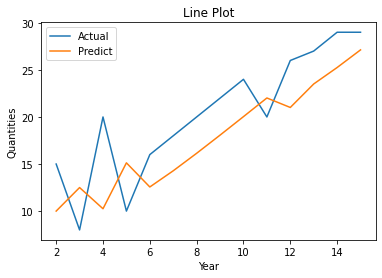

In [13]:
F = exponential_smoothing_1(alpha, data)
line_chart(F, data, t)

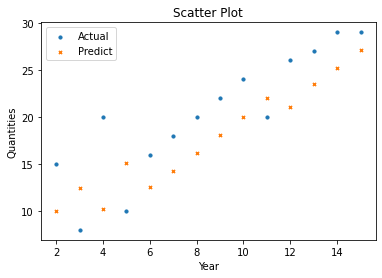

In [14]:
F = exponential_smoothing_1(alpha, data)
scatter_diagram(F, data, t)